<!-- dom:TITLE: Examples on how to integrate a computational perspective in physics courses -->
# Examples on how to integrate a computational perspective in physics courses
<!-- dom:AUTHOR: Danny Caballero, Sean Couch, Wade Fisher, Connor Glosser, Nat Hawkins, Morten Hjorth-Jensen, Claire Kopenhafer, Brian O'Shea, and Carlo Piermarocchi -->
<!-- Author: -->  
**Danny Caballero, Sean Couch, Wade Fisher, Connor Glosser, Nat Hawkins, Morten Hjorth-Jensen, Claire Kopenhafer, Brian O'Shea, and Carlo Piermarocchi**

Date: **Apr 3, 2018**

## Examples of simple algorithms, initial value problems and proper scaling of equations
1. Ordinary differential equations (ODE): RLC circuit

2. ODE: Classical pendulum

3. ODE: Solar system

4. and many more cases

Can use essentially the **same algorithms to solve these problems**, either some simple modified Euler algorithms or some Runge-Kutta class of algorithms or perhaps the so-called Verlet class of algorithms.  **Algorithms students use in one course can be reused in other courses**.





## Mechanics and electromagnetism, initial value problems
**When properly scaled, these equations are essentially the same. Scaling is important.**


Classical pendulum with damping and external force as it could appear in a mechanics course (PHY 321)

$$
ml\frac{d^2\theta}{dt^2}+\nu\frac{d\theta}{dt}  +mgsin(\theta)=Acos(\omega t).
$$

Easy to solve numerically and then visualize the solution.
Almost the same equation for an RLC circuit in the electromagnetism course (PHY 481/482)

$$
L\frac{d^2Q}{dt^2}+\frac{Q}{C}+R\frac{dQ}{dt}=Acos(\omega t).
$$

## Mechanics and electromagnetism, initial value problems and now proper scaling

Classical pendulum equations with damping and external force

$$
\frac{d\theta}{d\hat{t}} =\hat{v},
$$

and

$$
\frac{d\hat{v}}{d\hat{t}} =Acos(\hat{\omega} \hat{t})-\hat{v}\xi-\sin(\theta),
$$

with $\omega_0=\sqrt{g/l}$, $\hat{t}=\omega_0 t$ and $\xi = mg/\omega_0\nu$.

The RLC circuit

$$
\frac{dQ}{d\hat{t}} =\hat{I},
$$

and

$$
\frac{d\hat{I}}{d\hat{t}} =Acos(\hat{\omega} \hat{t})-\hat{I}\xi-Q,
$$

with $\omega_0=1/\sqrt{LC}$, $\hat{t}=\omega_0 t$ and $\xi = CR\omega_0$.

The equations are essentially the same. **Great potential for abstraction**. Use the same program with small modifications.






## Other examples of simple algorithms that can be reused in many courses, two-point boundary value problems and scaling
These physics examples can all be studied using almost the same types of algorithms, simple eigenvalue solvers or Gaussian elimination with **almost** the same starting matrix!

1. A buckling beam and tridiagonal Toeplitz matrices (mechanics and mathematical methods), eigenvalue problems

2. A particle in an infinite potential well, quantum eigenvalue problems

3. A particle (or two) in a general quantum well, quantum eigenvalue problems

4. Poisson's  equation in one dim, linear algebra (electromagnetism)

5. The diffusion equation in one dimension (Statistical Physics), linear algebra

6. and many other cases





## A buckling beam, or a quantum mechanical particle in an infinite well
This is a two-point boundary value problem

$$
R \frac{d^2 u(x)}{dx^2} = -F u(x),
$$

where $u(x)$ is the vertical displacement, $R$ is a material specific constant, $F$ the force and $x \in [0,L]$ with $u(0)=u(L)=0$.

Scale equations with $x = \rho L$ and $\rho \in [0,1]$ and get (note that we change from $u(x)$ to $v(\rho)$)

$$
\frac{d^2 v(\rho)}{dx^2} +K v(\rho)=0,
$$

a standard eigenvalue problem with $K= FL^2/R$.

If you replace $R=-\hbar^2/2m$ and $-F=\lambda$, we have the quantum mechanical variant for a particle moving in a well with infinite walls at the endpoints.



## Discretize and get the same type of problem
Discretize the second derivative and the rhs

$$
-\frac{v_{i+1} -2v_i +v_{i-i}}{h^2}=\lambda v_i,
$$

with $i=1,2,\dots, n$. We need to add to this system the two boundary conditions $v(0) =v_0$ and $v(1) = v_{n+1}$.
The so-called Toeplitz matrix (special case from the discretized second derivative)

$$
\mathbf{A} = \frac{1}{h^2}\begin{bmatrix}
                          2 & -1 &  &   &  & \\
                          -1 & 2 & -1 & & & \\
                           & -1 & 2 & -1 & &  \\
                           & \dots   & \dots &\dots   &\dots & \dots \\
                           &   &  &-1  &2& -1 \\
                           &    &  &   &-1 & 2 \\
                      \end{bmatrix}
$$

with the corresponding vectors $\mathbf{v} = (v_1, v_2, \dots,v_n)^T$ allows us to rewrite the differential equation
including the boundary conditions as a standard eigenvalue problem

$$
\mathbf{A}\mathbf{v} = \lambda\mathbf{v}.
$$

The Toeplitz matrix has analytical eigenpairs!! Adding a potential along the diagonals allows us to reuse this problem for many types of physics cases.




## Adding complexity, hydrogen-like atoms or other one-particle potentials
Assume we want to solve the radial part of Schroedinger's equation for one particle in three dimensions. This equation reads

$$
-\frac{\hbar^2}{2 m} \left ( \frac{1}{r^2} \frac{d}{dr} r^2
  \frac{d}{dr} - \frac{l (l + 1)}{r^2} \right )R(r)
     + V(r) R(r) = E R(r).
$$

Suppose in our  case $V(r)$ is the harmonic oscillator potential $(1/2)kr^2$ with
$k=m\omega^2$ and $E$ is
the energy of the harmonic oscillator in three dimensions.

Scale now the equations with $\rho = r/\alpha$ where $\alpha$ is a constant of dimension length.






## A natural length scale comes out automagically when scaling
Manipulating the equations by requiring

$$
\frac{mk}{\hbar^2} \alpha^4 = 1,
$$

which define defines a natural length scale (like the Bohr radius does)

$$
\alpha = \left(\frac{\hbar^2}{mk}\right)^{1/4}.
$$

Defining

$$
\lambda = \frac{2m\alpha^2}{\hbar^2}E,
$$

we can rewrite Schroedinger's equation as

$$
-\frac{d^2}{d\rho^2} v(\rho) + \rho^2v(\rho)  = \lambda v(\rho) .
$$

This is similar to the equation for a buckling beam except for the potential term.




## The Python code
The code sets up the Hamiltonian matrix by defining the minimun and maximum values of $r$ with a
maximum value of integration points. It plots the
eigenfunctions of the three lowest eigenstates.

1.499902823403212
3.4995140822738375
5.498814270799174


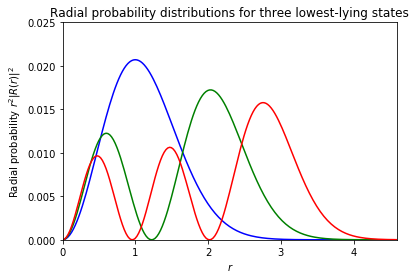

In [1]:
%matplotlib inline

#Program which solves the one-particle Schrodinger equation
#for a potential specified in function
#potential().

from  matplotlib import pyplot as plt
import numpy as np
#Function for initialization of parameters
def initialize():
    RMin = 0.0
    RMax = 10.0
    lOrbital = 0
    Dim = 400
    return RMin, RMax, lOrbital, Dim
# Harmonic oscillator here, easy to change
def potential(r):
    return 0.5*r*r

#Get the boundary, orbital momentum and number of integration points
RMin, RMax, lOrbital, Dim = initialize()

#Initialize constants
Step    = RMax/(Dim+1)
DiagConst = 1.0/ (Step*Step)
NondiagConst =  -0.5 / (Step*Step)
OrbitalFactor = 0.5*lOrbital * (lOrbital + 1.0)

#Calculate array of potential values
v = np.zeros(Dim)
r = np.linspace(RMin,RMax,Dim)
for i in range(Dim):
    r[i] = RMin + (i+1) * Step;
    v[i] = potential(r[i]) + OrbitalFactor/(r[i]*r[i]);

#Setting up a tridiagonal matrix and finding eigenvectors and eigenvalues
Matrix = np.zeros((Dim,Dim))
Matrix[0,0] = DiagConst + v[0];
Matrix[0,1] = NondiagConst;
for i in range(1,Dim-1):
    Matrix[i,i-1]  = NondiagConst;
    Matrix[i,i]    = DiagConst + v[i];
    Matrix[i,i+1]  = NondiagConst;
Matrix[Dim-1,Dim-2] = NondiagConst;
Matrix[Dim-1,Dim-1] = DiagConst + v[Dim-1];
# diagonalize and obtain eigenvalues, not necessarily sorted
EigValues, EigVectors = np.linalg.eig(Matrix)
# sort eigenvectors and eigenvalues
permute = EigValues.argsort()
EigValues = EigValues[permute]
EigVectors = EigVectors[:,permute]
# now plot the results for the three lowest lying eigenstates
for i in range(3):
    print(EigValues[i])
FirstEigvector = EigVectors[:,0]
SecondEigvector = EigVectors[:,1]
ThirdEigvector = EigVectors[:,2]
plt.plot(r, FirstEigvector**2 ,'b-',r, SecondEigvector**2 ,'g-',r, ThirdEigvector**2 ,'r-')
plt.axis([0,4.6,0.0, 0.025])
plt.xlabel(r'$r$')
plt.ylabel(r'Radial probability $r^2|R(r)|^2$')
plt.title(r'Radial probability distributions for three lowest-lying states')
plt.savefig('eigenvector.pdf')
plt.show()

## The power of numerical methods
The last example shows the potential of combining numerical algorithms with analytical results (or eventually symbolic calculations). 
A simple change of potential gives a new physics case, example of a box potential

In [2]:
# Different types of potentials
def potential(r):
    if r >= 0.0 and r <= 10.0:
        V = -0.05
    else:
        V =0.0
    return V

This allows students and teachers to

* make abstraction and explore other physics cases easily where no analytical solutions are known

* Validate and verify  their  algorithms.

* Including concepts like unit testing, one has the possibility to test and validate several or all parts of the code.

* Validation and verification are then included *naturally* and one can develop a better attitude to what is meant with an ethically sound scientific approach.

* The above example allows the student to also test the mathematical error of the algorithm for the eigenvalue solver by changing the number of integration points. The students get trained from day one to think error analysis.

* The algorithm can be tailored to any kind of one-particle problem used in quantum mechanics or eigenvalue problems

* A simple rewrite allows for reuse in linear algebra problems for solution of say Poisson's equation in electromagnetism, or the diffusion equation in one dimension.

* With an ipython notebook the students can keep exploring similar examples and turn them in as their own notebooks.